In [1]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import os

# データフレーム読み込み
train_df = pd.read_csv("/kaggle/input/playground-series-s5e8/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s5e8/test.csv")

# データ結合
all_df = pd.concat([train_df,test_df],axis=0,ignore_index=True)
all_df_NN = all_df.copy()
max_row = len(all_df)

In [2]:
# all_df.info() # 特徴量、欠損、型確認

In [3]:
# test_df.head()

In [4]:
# all_df.head(1)

### 数値列のカテゴリ化を行う

In [5]:
# # ageをカテゴリ化
# all_df["age_cls"] = all_df["age"].copy()

# all_df.loc[all_df["age"]<20,"age_cls"] = "20歳未満"
# all_df.loc[(all_df["age"]>=20) & (all_df["age"]<25),"age_cls"] = "20〜25歳"
# all_df.loc[(all_df["age"]>=25) & (all_df["age"]<30),"age_cls"] = "25〜30歳"
# all_df.loc[(all_df["age"]>=30) & (all_df["age"]<35),"age_cls"] = "30〜35歳"
# all_df.loc[(all_df["age"]>=35) & (all_df["age"]<40),"age_cls"] = "35〜40歳"
# all_df.loc[(all_df["age"]>=40) & (all_df["age"]<45),"age_cls"] = "40〜45歳"
# all_df.loc[(all_df["age"]>=45) & (all_df["age"]<50),"age_cls"] = "45〜50歳"
# all_df.loc[(all_df["age"]>=50) & (all_df["age"]<55),"age_cls"] = "50〜55歳"
# all_df.loc[all_df["age"]>=55,"age_cls"] = "55歳以上"

# all_df['age_cls'] = all_df['age_cls'].astype('object')
# # print(all_df.groupby(["age_cls"]).size())

In [6]:
# # balanceをカテゴリ化
# all_df["balance_cls"] = all_df["balance"].copy()

# all_df.loc[all_df["balance"]<-1000,"balance_cls"] = "-1000€未満"
# all_df.loc[(all_df["balance"]>=-1000) & (all_df["balance"]<0),"balance_cls"] = "-1000〜0€"
# all_df.loc[(all_df["balance"]>=0) & (all_df["balance"]<1000),"balance_cls"] = "0〜1000€"
# all_df.loc[(all_df["balance"]>=1000) & (all_df["balance"]<2000),"balance_cls"] = "1000〜2000€"
# all_df.loc[(all_df["balance"]>=2000) & (all_df["balance"]<3000),"balance_cls"] = "2000〜3000€"
# all_df.loc[(all_df["balance"]>=3000) & (all_df["balance"]<4000),"balance_cls"] = "3000〜4000€"
# all_df.loc[(all_df["balance"]>=4000) & (all_df["balance"]<5000),"balance_cls"] = "4000〜5000€"
# all_df.loc[(all_df["balance"]>=5000) & (all_df["balance"]<6000),"balance_cls"] = "5000〜6000€"
# all_df.loc[all_df["balance"]>=6000,"balance_cls"] = "6000€以上"

# all_df['balance_cls'] = all_df['balance_cls'].astype('object')
# print(all_df.groupby(["balance_cls"]).size())

In [7]:
# # durationをカテゴリ化
# all_df["duration_cls"] = all_df["duration"].copy()

# all_df.loc[all_df["duration"]<100,"duration_cls"] = "100秒未満"
# all_df.loc[(all_df["duration"]>=100) & (all_df["duration"]<200),"duration_cls"] = "100〜200秒"
# all_df.loc[(all_df["duration"]>=200) & (all_df["duration"]<300),"duration_cls"] = "200〜300秒"
# all_df.loc[(all_df["duration"]>=300) & (all_df["duration"]<400),"duration_cls"] = "300〜400秒"
# all_df.loc[(all_df["duration"]>=400) & (all_df["duration"]<500),"duration_cls"] = "400〜500秒"
# all_df.loc[(all_df["duration"]>=500) & (all_df["duration"]<600),"duration_cls"] = "500〜600秒"
# all_df.loc[(all_df["duration"]>=600) & (all_df["duration"]<700),"duration_cls"] = "600〜700秒"
# all_df.loc[(all_df["duration"]>=700) & (all_df["duration"]<800),"duration_cls"] = "700〜800秒"
# all_df.loc[(all_df["duration"]>=800) & (all_df["duration"]<900),"duration_cls"] = "800〜900秒"
# all_df.loc[(all_df["duration"]>=900) & (all_df["duration"]<1000),"duration_cls"] = "900〜1000秒"
# all_df.loc[all_df["duration"]>=1000,"duration_cls"] = "1000秒以上"

# # all_df.loc[all_df["duration"]<50,"duration_cls"] = "50秒未満"
# # all_df.loc[(all_df["duration"]>=50) & (all_df["duration"]<100),"duration_cls"] = "50〜100秒"
# # all_df.loc[(all_df["duration"]>=100) & (all_df["duration"]<150),"duration_cls"] = "100〜150秒"
# # all_df.loc[(all_df["duration"]>=150) & (all_df["duration"]<200),"duration_cls"] = "150〜200秒"
# # all_df.loc[(all_df["duration"]>=200) & (all_df["duration"]<250),"duration_cls"] = "200〜250秒"
# # all_df.loc[(all_df["duration"]>=250) & (all_df["duration"]<300),"duration_cls"] = "250〜300秒"
# # all_df.loc[(all_df["duration"]>=300) & (all_df["duration"]<350),"duration_cls"] = "300〜350秒"
# # all_df.loc[(all_df["duration"]>=350) & (all_df["duration"]<400),"duration_cls"] = "350〜400秒"
# # all_df.loc[(all_df["duration"]>=400) & (all_df["duration"]<450),"duration_cls"] = "400〜450秒"
# # all_df.loc[(all_df["duration"]>=450) & (all_df["duration"]<500),"duration_cls"] = "450〜500秒"
# # all_df.loc[(all_df["duration"]>=500) & (all_df["duration"]<550),"duration_cls"] = "500〜550秒"
# # all_df.loc[(all_df["duration"]>=550) & (all_df["duration"]<600),"duration_cls"] = "450〜500秒"
# # all_df.loc[(all_df["duration"]>=600) & (all_df["duration"]<650),"duration_cls"] = "500〜550秒"
# # all_df.loc[(all_df["duration"]>=650) & (all_df["duration"]<700),"duration_cls"] = "450〜500秒"
# # all_df.loc[(all_df["duration"]>=700) & (all_df["duration"]<750),"duration_cls"] = "500〜550秒"
# # all_df.loc[(all_df["duration"]>=750) & (all_df["duration"]<800),"duration_cls"] = "450〜500秒"
# # all_df.loc[(all_df["duration"]>=800) & (all_df["duration"]<850),"duration_cls"] = "500〜550秒"
# # all_df.loc[(all_df["duration"]>=850) & (all_df["duration"]<900),"duration_cls"] = "450〜500秒"
# # all_df.loc[(all_df["duration"]>=900) & (all_df["duration"]<950),"duration_cls"] = "500〜550秒"
# # all_df.loc[(all_df["duration"]>=950) & (all_df["duration"]<1000),"duration_cls"] = "450〜500秒"
# # all_df.loc[all_df["duration"]>=1000,"duration_cls"] = "1000秒以上"

# all_df['duration_cls'] = all_df['duration_cls'].astype('object')
# # print(all_df.groupby(["duration_cls"]).size())

In [8]:
# # campaignをカテゴリ化
# all_df["campaign_cls"] = all_df["campaign"].copy()

# # 11以上は雑多なのでくっつける
# all_df.loc[all_df["campaign"]>10,"campaign_cls"] = 11

# all_df['campaign_cls'] = all_df['campaign_cls'].astype('object')
# # print(all_df.groupby(["campaign_cls"]).size())

In [9]:
# # pdaysをカテゴリ化
# # 90日で割る。キャンペーンが90日ごとに行われているフシがある
# all_df["pdays_cls"] = all_df["pdays"].copy()
# all_df["pdays_cls"] = round(all_df["pdays_cls"] / 90,0)
# all_df.loc[all_df["pdays_cls"]>=8,"pdays_cls"] = 8


# all_df["pdays_cls"] = all_df["pdays_cls"].astype("object")

# # print(all_df.groupby(["pdays_cls"]).size())

In [10]:
# # previousをカテゴリ化
# all_df["previous_cls"] = all_df["previous"].copy()

# all_df.loc[all_df["previous"]>10,"previous_cls"] = 11

# all_df['previous_cls'] = all_df['previous_cls'].astype('object')
# # print(all_df.groupby(["previous_cls"]).size())

### 新規特徴量を作成する

In [11]:
# (1) 住宅ローン + ローン
all_df["housing_loan"] = all_df["housing"].astype(str) + "_" + all_df["loan"].astype(str)

# (2) コンタクト時間 x 年齢
all_df["duration_x_age"] = all_df["duration"] * all_df["age"]

# (3) sin,cos(コンタクト時間)
all_df['duration_sin'] = np.sin(2*np.pi * all_df['duration'] / 400)
all_df['duration_cos'] = np.cos(2*np.pi * all_df['duration'] / 400)

# (4) monthを数値に直し周期的に使う
month_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
all_df['month_num'] = all_df['month'].map(month_map).astype('int')
all_df['month_sin'] = np.sin(2 * np.pi * all_df['month_num'] / 12)
all_df['month_cos'] = np.cos(2 * np.pi * all_df['month_num'] / 12)

# (5) コンタクト時間をカテゴリ化
all_df['duration_bin'] = pd.cut(
    all_df['duration'],
    bins=[0, 60, 300, 600, 900, float('inf')],
    labels=['short', 'medium', 'long', 'very_long', 'extreme'],
    right=False)
all_df['duration_bin'] = all_df['duration_bin'].astype("object")

# (6) 連絡手段 + 年齢
all_df['age_group'] = pd.cut(
    all_df['age'],
    bins=[0, 30, 45, 60, 100],
    labels=['young', 'mid', 'senior', 'elder'])
all_df["contact_age"] = all_df["contact"].astype(str) + "_" + all_df["age_group"].astype(str)
all_df = all_df.drop("age_group",axis=1)

# (7) sin,cos(pdays)
all_df['pdays_sin'] = np.sin(2*np.pi * all_df['pdays'] / 90)
all_df['pdays_cos'] = np.cos(2*np.pi * all_df['pdays'] / 90)

In [12]:
# dayが5-10日はy=0が多い
# all_df["day_cls"] = all_df["day"].copy()
# all_df.loc[all_df["day"]%10<5,"day_cls"] = "1stHalf"
# all_df.loc[all_df["day"]%10>=5,"day_cls"] = "2ndHalf"
# all_df["day_cls"] = all_df["day_cls"].astype(str)



# sin,cos(10days)
# all_df['days_sin/5'] = np.sin(2*np.pi * all_df['day'] / 5)
# all_df['days_cos/5'] = np.cos(2*np.pi * all_df['day'] / 5)

# sin,cos(15days)
# all_df['days_sin/15'] = np.sin(2*np.pi * all_df['pdays'] / 15)
# all_df['days_cos/15'] = np.cos(2*np.pi * all_df['pdays'] / 15)

### カテゴリ化した元は数値の列を削除する

In [13]:
# # カテゴリ列削除
# RMV = ["age_cls","balance_cls","duration_cls","campaign_cls","pdays_cls","previous_cls"]
# all_df = all_df.drop(RMV,axis=1)

In [14]:
# 数値列とカテゴリ列を取得
num_col = []
cat_col = []

# train_df = train_df.drop(["id","y"],axis=1)

all_df2 = all_df.drop(["id","y"],axis=1)

for col in all_df2.columns:
    if all_df2[col].dtypes!="object":
        num_col.append(col)
    else:
        cat_col.append(col)

In [15]:
# 訓練データとテストデータに分離
train = all_df[:len(train_df)]
test = all_df[len(train_df):]

# 訓練データをx,yに分割
X_train = train.drop(["id","y"],axis=1)
y_train = train["y"]
X_test = test.drop(["id","y"],axis=1)

In [16]:
# # 相関係数を確認する
# import seaborn as sns
# import matplotlib.pyplot as plt

# train_corr = X_train.drop(cat_col,axis=1).corr()
# sns.clustermap(train_corr,annot=True,fmt=".2f",cmap="bwr")
# plt.show()

In [17]:
# ラベルエンコード
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for col in X_train.columns:
    if col in cat_col:
        
        # 訓練データでfit
        LE.fit(X_train[col])

        # 訓練・テストデータをそれぞれtransform
        X_train[col] = LE.transform(X_train[col])
        X_test[col] = LE.transform(X_test[col])

# データフレーム変換
X_train_df = pd.DataFrame(X_train,columns=cat_col)
X_test_df = pd.DataFrame(X_test,columns=cat_col)

### 【Light GBM】

In [18]:
###################################################
############ Light GBM ############################
###################################################
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings("ignore")

# 学習、バリデーションデータ
pred_lgb = np.zeros(len(train_df))
pred_lgb_test = np.zeros(len(test_df))
models_lgb = []

# 入力データ
X = X_train
y = y_train

# 評価履歴を格納する辞書
evals_result_lgb = {}

# パラメータ
lgbm_params = {
    'objective': 'binary',
    # "device": "cpu",
    "device": "gpu",
    'metric': 'auc',
    'verbose': -1,              # ログ出力の制御
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    # 'feature_fraction': 0.6956717916553479,
    # 'num_leaves':       153,
    # 'bagging_fraction': 0.5279852787927486,
    # 'bagging_freq':     4,
    # 'lambda_l1':        0.004603414256652151,
    # 'lambda_l2':        0.013858762846118894,
    # 'min_data_in_leaf': 87,
    }

# クロスバリデーション
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# for fold,(train_idx,valid_idx) in enumerate(kf.split(X)):
for fold,(train_idx,valid_idx) in enumerate(skf.split(X,y)):

    print("#"*25)
    print(f"### Fold {fold+1}")
    print("#"*25)
    
    X_train_kf = X.iloc[train_idx,:]
    y_train_kf = y.iloc[train_idx]
    X_valid_kf = X.iloc[valid_idx,:]
    y_valid_kf = y.iloc[valid_idx]
    
    # データセット作成
    lgb_train_lgb = lgb.Dataset(X_train_kf,y_train_kf,
                                categorical_feature=[cat_col])
    lgb_valid_lgb = lgb.Dataset(X_valid_kf,y_valid_kf,
                                categorical_feature=[cat_col])

    # lgb_train_lgb = lgb.Dataset(X_train_kf,y_train_kf)
    # lgb_valid_lgb = lgb.Dataset(X_valid_kf,y_valid_kf)

    # 学習
    model_lgb = lgb.train(
        lgbm_params,
        lgb_train_lgb,
        num_boost_round=2000,
        categorical_feature=cat_col,
        valid_sets=[lgb_train_lgb,lgb_valid_lgb],
        valid_names=["train","valid"],
        callbacks=[
            lgb.early_stopping(stopping_rounds=100,verbose=False),
            lgb.record_evaluation(evals_result_lgb),
            lgb.log_evaluation(100),])

    # 各foldでのバリデーション予測
    pred_lgb[valid_idx] = model_lgb.predict(
        X_valid_kf, num_iteration=model_lgb.best_iteration)
    
    # モデルの追加
    models_lgb.append(model_lgb)

    # テストの予測
    pred_lgb_test = pred_lgb_test + model_lgb.predict(
        X_test, num_iteration=model_lgb.best_iteration)

# FOLD数で割る
pred_lgb_test = pred_lgb_test/5

#########################
### Fold 1
#########################


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


[100]	train's auc: 0.967808	valid's auc: 0.967007
[200]	train's auc: 0.970723	valid's auc: 0.968213
[300]	train's auc: 0.972983	valid's auc: 0.969176
[400]	train's auc: 0.974815	valid's auc: 0.969785
[500]	train's auc: 0.976353	valid's auc: 0.970229
[600]	train's auc: 0.97711	valid's auc: 0.970034
#########################
### Fold 2
#########################
[100]	train's auc: 0.967837	valid's auc: 0.96588
[200]	train's auc: 0.971044	valid's auc: 0.967477
[300]	train's auc: 0.973225	valid's auc: 0.968474
[400]	train's auc: 0.974839	valid's auc: 0.969016
[500]	train's auc: 0.976334	valid's auc: 0.969394
[600]	train's auc: 0.977664	valid's auc: 0.969747
[700]	train's auc: 0.97878	valid's auc: 0.969928
[800]	train's auc: 0.979866	valid's auc: 0.970101
[900]	train's auc: 0.98091	valid's auc: 0.970236
[1000]	train's auc: 0.981785	valid's auc: 0.970303
[1100]	train's auc: 0.982674	valid's auc: 0.970312
#########################
### Fold 3
#########################
[100]	train's auc: 0.96785

In [19]:
# 訓練データのスコア
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

AUC_lgb = roc_auc_score(y,pred_lgb)
F1_lgb = f1_score(y,np.round(pred_lgb,0))
print(f"LGB: AUC score = {AUC_lgb}, F1 = {F1_lgb}")

# 学習曲線
# lgb.plot_metric(evals_result_lgb,title="LightGBM AUC",)

LGB: AUC score = 0.9703482204646829, F1 = 0.7376107351360771


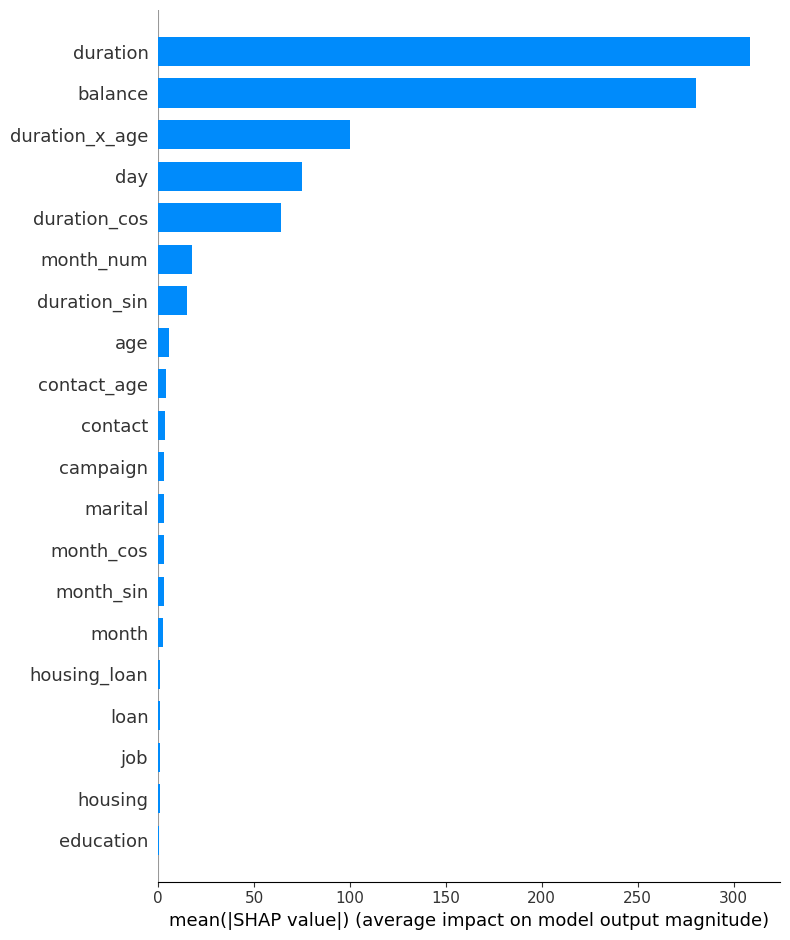

In [20]:
import shap
import lightgbm as lgb
import matplotlib.pyplot as plt
shap.initjs()

# サンプリング
X_sample = X.sample(2000, random_state=0)

shapval = 0
for i in range(5):
    explainer = shap.TreeExplainer(models_lgb[i])
    shap_values = explainer.shap_values(X_sample)
    if isinstance(shap_values, list):  # 2クラス分類
        shap_values = shap_values[1]
    shapval += shap_values

shap.summary_plot(shapval, X_sample, plot_type="bar")

In [21]:
# 重要度の算出
feature_importances = 0
for i in range(5):
  feature_importances += pd.DataFrame(models_lgb[i].feature_importance(),columns=['importance'])

feature=pd.DataFrame(X.columns,columns=['feature'])
o=pd.concat([feature,feature_importances],axis=1)
o = o.sort_values("importance", ascending=False)
print(o)

           feature  importance
5          balance       18256
19    duration_cos       13920
11        duration       12762
18    duration_sin       12404
9              day       11208
17  duration_x_age       10855
0              age        9573
10           month        6050
12        campaign        4780
13           pdays        4365
1              job        4337
25       pdays_sin        3864
2          marital        2614
22       month_cos        2370
26       pdays_cos        2368
24     contact_age        2213
20       month_num        2091
21       month_sin        2036
14        previous        1925
8          contact        1594
6          housing        1391
15        poutcome         877
7             loan         770
16    housing_loan         738
3        education         718
23    duration_bin         669
4          default         222


Text(0.5, 1.0, 'Feature Importances ')

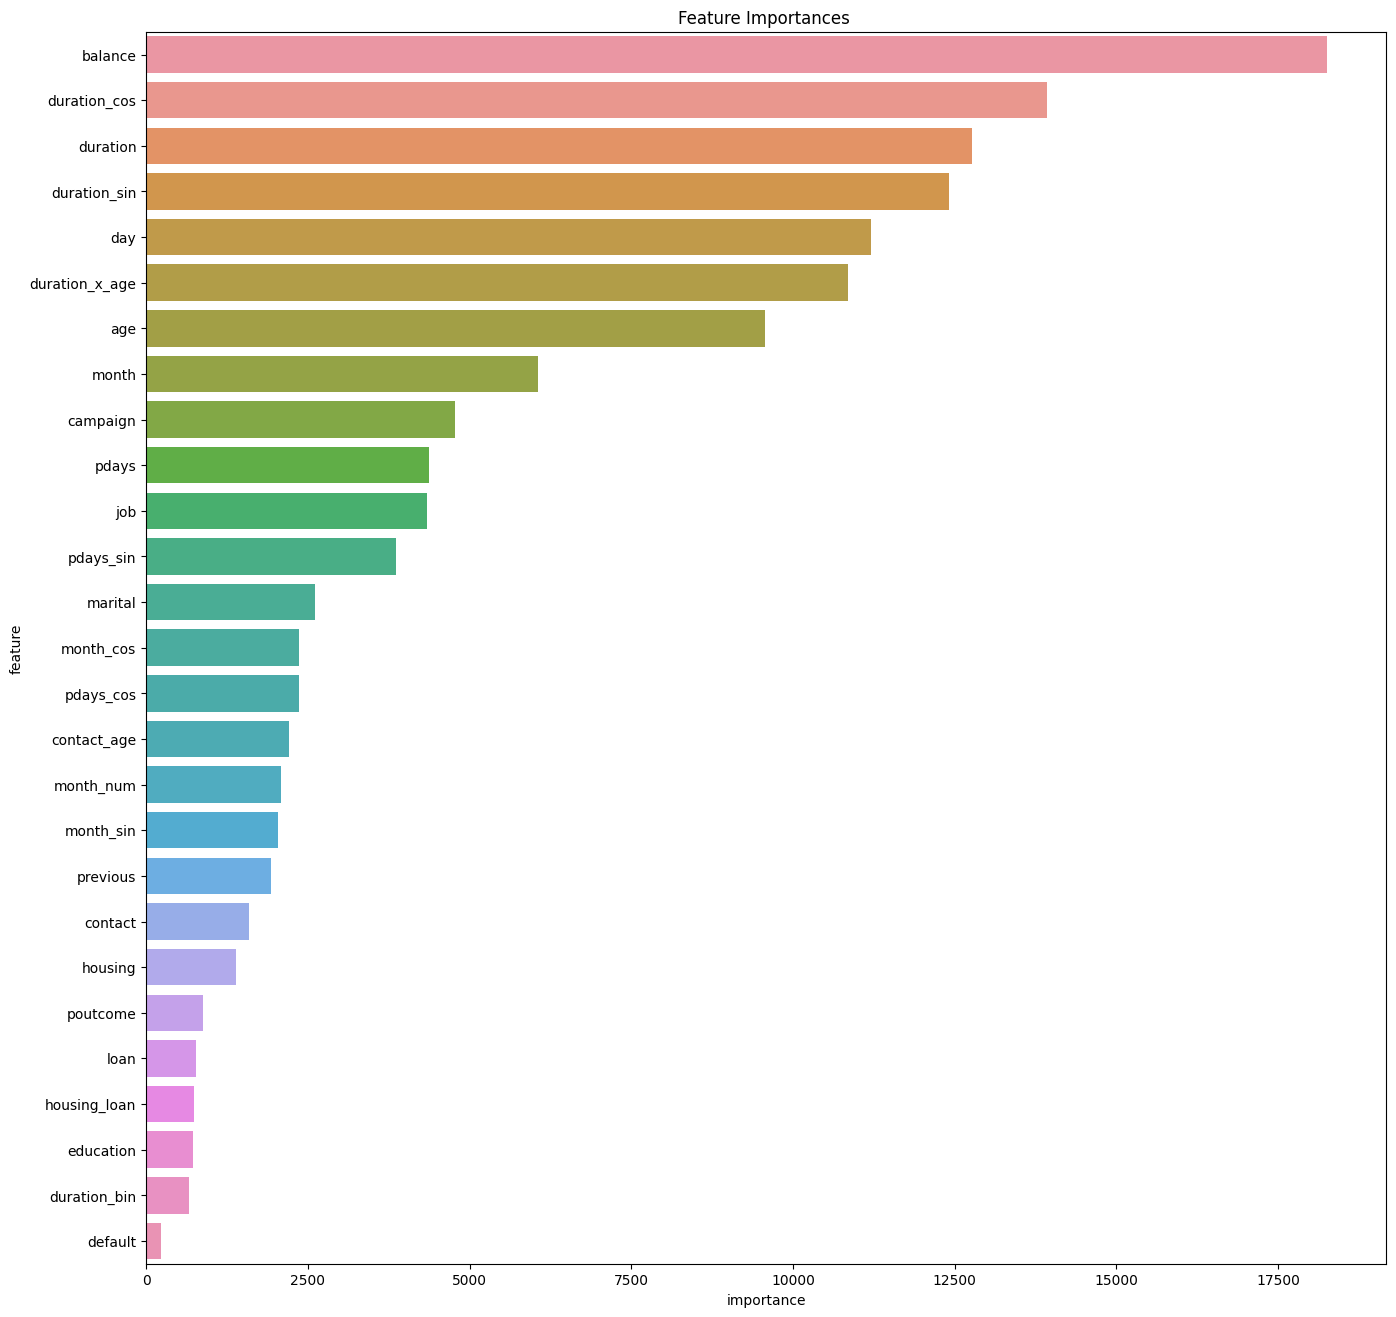

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 16))
sns.barplot(data=o.sort_values(by='importance', ascending=False), x='importance', y='feature')
plt.title('Feature Importances ')

In [23]:
# # 提出データ作成
# sample_submission = pd.read_csv("/kaggle/input/playground-series-s5e8/sample_submission.csv")

# sample_submission['y'] = pred_lgb_test
# sample_submission.to_csv('submission.csv', index=False)
# print('Submission file saved.')

### 【XGBoost】

In [24]:
#################################################
############ XGBoost ############################
#################################################
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 学習、バリデーションデータ
pred_xgb = np.zeros(len(train_df))
pred_xgb_test = np.zeros(len(test_df))
models_xgb = []

# 入力データ
X = X_train
y = y_train

# 評価履歴を保存する辞書
evals_result_xgb = {}

# パラメータ
xgb_params = {
    "objective": "binary:logistic",
    # "tree_method": "hist",
    "tree_method": "gpu_hist",
    "gpu_id": 0,
    "eval_metric": "auc",
}

# クロスバリデーション
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# for fold, (train_idx,valid_idx) in enumerate(kf.split(X)):
for fold,(train_idx,valid_idx) in enumerate(skf.split(X,y)):

    print("#"*25)
    print(f"### Fold {fold+1}")
    print("#"*25)

    # foldごとの訓練、バリデーションデータ
    X_train_kf = X.iloc[train_idx,:]
    y_train_kf = y.iloc[train_idx]
    X_valid_kf = X.iloc[valid_idx,:]
    y_valid_kf = y.iloc[valid_idx]

    # DMatrixに変換
    dtrain = xgb.DMatrix(X_train_kf,label=y_train_kf,enable_categorical=True)
    dvalid = xgb.DMatrix(X_valid_kf,label=y_valid_kf,enable_categorical=True)

    # 学習
    model_xgb = xgb.train(
        xgb_params,
        dtrain,
        num_boost_round=2000,
        evals=[(dtrain,"train"),(dvalid,"valid")],
        early_stopping_rounds=100,
        evals_result=evals_result_xgb,
        verbose_eval=100,
    )

    # 各foldでのバリデーション予測
    pred_xgb[valid_idx] = model_xgb.predict(
        dvalid,
        iteration_range=(0,model_xgb.best_iteration+1))

    # モデルの追加
    models_xgb.append(model_xgb)

    # テストの予測
    dtest = xgb.DMatrix(X_test,enable_categorical=True)
    pred_xgb_test = pred_xgb_test + model_xgb.predict(
        dtest,
        iteration_range=(0,model_xgb.best_iteration+1))

# FOLD数で割る
pred_xgb_test = pred_xgb_test/5

#########################
### Fold 1
#########################
[0]	train-auc:0.93472	valid-auc:0.93579
[100]	train-auc:0.97321	valid-auc:0.96901
[200]	train-auc:0.97806	valid-auc:0.97045
[300]	train-auc:0.98113	valid-auc:0.97077
[400]	train-auc:0.98351	valid-auc:0.97087
[463]	train-auc:0.98478	valid-auc:0.97078
#########################
### Fold 2
#########################
[0]	train-auc:0.93514	valid-auc:0.93406
[100]	train-auc:0.97359	valid-auc:0.96796
[200]	train-auc:0.97842	valid-auc:0.96932
[300]	train-auc:0.98160	valid-auc:0.96977
[400]	train-auc:0.98392	valid-auc:0.96981
[485]	train-auc:0.98566	valid-auc:0.96973
#########################
### Fold 3
#########################
[0]	train-auc:0.93499	valid-auc:0.93377
[100]	train-auc:0.97373	valid-auc:0.96759
[200]	train-auc:0.97849	valid-auc:0.96907
[300]	train-auc:0.98165	valid-auc:0.96954
[400]	train-auc:0.98421	valid-auc:0.96962
[470]	train-auc:0.98555	valid-auc:0.96956
#########################
### Fold 4
########################

In [25]:
# 訓練データのスコア
from sklearn.metrics import f1_score

AUC_xgb = roc_auc_score(y,pred_xgb)
F1_xgb = f1_score(y,np.round(pred_xgb,0))
print(f"XGB: AUC score = {AUC_xgb}, F1 = {F1_xgb}")

XGB: AUC score = 0.9702042732689221, F1 = 0.7368335358868647


In [26]:
# # 提出データ作成
# sample_submission = pd.read_csv("/kaggle/input/playground-series-s5e8/sample_submission.csv")

# sample_submission['y'] = pred_xgb_test
# sample_submission.to_csv('submission.csv', index=False)
# print('Submission file saved.')

In [27]:
# # 学習曲線の描画
# from matplotlib.pyplot as plt
# epochs = len(evals_result_xgb['train']['auc'])
# x_axis = range(0, epochs)

# plt.figure()
# plt.plot(x_axis, evals_result_xgb['train']['auc'], label='Train')
# plt.plot(x_axis, evals_result_xgb['valid']['auc'], label='Validation')
# plt.xlabel('Iteration')
# plt.ylabel('AUC')
# plt.title('XGBoost AUC')
# plt.grid()
# plt.legend()
# plt.show()

### 【CatBoost】

In [28]:
#################################################
############ CatBoost ############################
#################################################
from catboost import Pool, train
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 学習、バリデーションデータ
pred_cb = np.zeros(len(train_df))
pred_cb_test = np.zeros(len(test_df))
models_cb = []

# 入力データ
X = X_train
y = y_train

# 履歴を保存
cb_auc_valid = []

cat_params = {
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    # "task_type": "CPU",
    "task_type": "GPU",
    # "devices": "0",
    "iterations": 4000,
    "verbose": 100,
}

# クロスバリデーション
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# for fold, (train_idx,valid_idx) in enumerate(kf.split(X)):
for fold,(train_idx,valid_idx) in enumerate(skf.split(X,y)):

    print("#"*25)
    print(f"### Fold {fold+1}")
    print("#"*25)
    
    X_train_kf = X.iloc[train_idx,:]
    y_train_kf = y.iloc[train_idx]
    X_valid_kf = X.iloc[valid_idx,:]
    y_valid_kf = y.iloc[valid_idx]    

    # object型をカテゴリ型に変換
    for col in cat_col:
        X_train_kf.loc[:,col] = X_train_kf.loc[:,col].astype("category")
        X_valid_kf.loc[:,col] = X_valid_kf.loc[:,col].astype("category")

    # データセット設定
    train_pool = Pool(X_train_kf,y_train_kf,cat_features=cat_col)
    valid_pool = Pool(X_valid_kf,y_valid_kf,cat_features=cat_col)

    # 学習
    model_cb = train(
        params=cat_params,
        dtrain=train_pool,
        eval_set=valid_pool,
        early_stopping_rounds=100)

    # 各foldでのバリデーション予測
    pred_cb[valid_idx] = model_cb.predict(X_valid_kf,
        ntree_end=model_cb.best_iteration_,
        prediction_type="Probability"
    )[:,1]
    

    # モデルを追加
    models_cb.append(model_cb)

    evals_result = model_cb.get_evals_result()
    cb_auc_valid.append(evals_result["validation"]["AUC"])

    # テストの予測
    pred_cb_test = pred_cb_test + model_cb.predict(X_test,
        ntree_end=model_cb.best_iteration_,
        prediction_type="Probability"
    )[:,1]

# FOLD数で割る
pred_cb_test = pred_cb_test/5

#########################
### Fold 1
#########################
Learning rate set to 0.023288


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9214177	best: 0.9214177 (0)	total: 6.49s	remaining: 7h 12m 23s
100:	test: 0.9511496	best: 0.9511496 (100)	total: 11.7s	remaining: 7m 31s
200:	test: 0.9566787	best: 0.9566787 (200)	total: 16.9s	remaining: 5m 18s
300:	test: 0.9593670	best: 0.9593670 (300)	total: 22s	remaining: 4m 30s
400:	test: 0.9610795	best: 0.9610795 (400)	total: 27.2s	remaining: 4m 3s
500:	test: 0.9621038	best: 0.9621038 (500)	total: 32.3s	remaining: 3m 45s
600:	test: 0.9629549	best: 0.9629549 (600)	total: 37.4s	remaining: 3m 31s
700:	test: 0.9635907	best: 0.9635907 (700)	total: 42.5s	remaining: 3m 20s
800:	test: 0.9640802	best: 0.9640802 (800)	total: 47.7s	remaining: 3m 10s
900:	test: 0.9645581	best: 0.9645581 (900)	total: 52.8s	remaining: 3m 1s
1000:	test: 0.9649279	best: 0.9649279 (1000)	total: 58s	remaining: 2m 53s
1100:	test: 0.9652681	best: 0.9652681 (1100)	total: 1m 3s	remaining: 2m 46s
1200:	test: 0.9655291	best: 0.9655291 (1200)	total: 1m 8s	remaining: 2m 39s
1300:	test: 0.9657704	best: 0.9657704 

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9212575	best: 0.9212575 (0)	total: 53.8ms	remaining: 3m 35s
100:	test: 0.9509538	best: 0.9509538 (100)	total: 5.18s	remaining: 3m 20s
200:	test: 0.9559256	best: 0.9559256 (200)	total: 10.4s	remaining: 3m 16s
300:	test: 0.9583503	best: 0.9583503 (300)	total: 15.5s	remaining: 3m 10s
400:	test: 0.9599182	best: 0.9599182 (400)	total: 20.7s	remaining: 3m 6s
500:	test: 0.9608527	best: 0.9608527 (500)	total: 25.9s	remaining: 3m
600:	test: 0.9615973	best: 0.9615973 (600)	total: 31s	remaining: 2m 55s
700:	test: 0.9622121	best: 0.9622121 (700)	total: 36.2s	remaining: 2m 50s
800:	test: 0.9627335	best: 0.9627335 (800)	total: 41.3s	remaining: 2m 45s
900:	test: 0.9631403	best: 0.9631403 (900)	total: 46.5s	remaining: 2m 40s
1000:	test: 0.9635319	best: 0.9635319 (1000)	total: 51.6s	remaining: 2m 34s
1100:	test: 0.9638312	best: 0.9638312 (1100)	total: 56.7s	remaining: 2m 29s
1200:	test: 0.9641267	best: 0.9641267 (1200)	total: 1m 1s	remaining: 2m 24s
1300:	test: 0.9643787	best: 0.9643787 (130

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9207957	best: 0.9207957 (0)	total: 53.7ms	remaining: 3m 34s
100:	test: 0.9500167	best: 0.9500167 (100)	total: 5.21s	remaining: 3m 21s
200:	test: 0.9554380	best: 0.9554380 (200)	total: 10.4s	remaining: 3m 16s
300:	test: 0.9579691	best: 0.9579691 (300)	total: 15.6s	remaining: 3m 11s
400:	test: 0.9594436	best: 0.9594436 (400)	total: 20.7s	remaining: 3m 5s
500:	test: 0.9605637	best: 0.9605637 (500)	total: 25.9s	remaining: 3m
600:	test: 0.9614846	best: 0.9614846 (600)	total: 31s	remaining: 2m 55s
700:	test: 0.9622012	best: 0.9622012 (700)	total: 36.2s	remaining: 2m 50s
800:	test: 0.9627750	best: 0.9627750 (800)	total: 41.3s	remaining: 2m 44s
900:	test: 0.9631813	best: 0.9631813 (900)	total: 46.4s	remaining: 2m 39s
1000:	test: 0.9635808	best: 0.9635808 (1000)	total: 51.6s	remaining: 2m 34s
1100:	test: 0.9638990	best: 0.9638990 (1100)	total: 56.8s	remaining: 2m 29s
1200:	test: 0.9641932	best: 0.9641932 (1200)	total: 1m 1s	remaining: 2m 24s
1300:	test: 0.9644611	best: 0.9644611 (130

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9217584	best: 0.9217584 (0)	total: 54ms	remaining: 3m 36s
100:	test: 0.9517398	best: 0.9517398 (100)	total: 5.25s	remaining: 3m 22s
200:	test: 0.9567621	best: 0.9567621 (200)	total: 10.5s	remaining: 3m 18s
300:	test: 0.9591686	best: 0.9591686 (300)	total: 15.7s	remaining: 3m 12s
400:	test: 0.9606462	best: 0.9606462 (400)	total: 20.8s	remaining: 3m 6s
500:	test: 0.9617509	best: 0.9617509 (500)	total: 25.9s	remaining: 3m
600:	test: 0.9625077	best: 0.9625077 (600)	total: 31s	remaining: 2m 55s
700:	test: 0.9631824	best: 0.9631824 (700)	total: 36.1s	remaining: 2m 50s
800:	test: 0.9636884	best: 0.9636884 (800)	total: 41.3s	remaining: 2m 44s
900:	test: 0.9640983	best: 0.9640983 (900)	total: 46.5s	remaining: 2m 39s
1000:	test: 0.9644446	best: 0.9644446 (1000)	total: 51.6s	remaining: 2m 34s
1100:	test: 0.9647674	best: 0.9647674 (1100)	total: 56.8s	remaining: 2m 29s
1200:	test: 0.9650586	best: 0.9650586 (1200)	total: 1m 1s	remaining: 2m 24s
1300:	test: 0.9653062	best: 0.9653062 (1300)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9207299	best: 0.9207299 (0)	total: 53.7ms	remaining: 3m 34s
100:	test: 0.9505444	best: 0.9505444 (100)	total: 5.23s	remaining: 3m 22s
200:	test: 0.9557468	best: 0.9557468 (200)	total: 10.4s	remaining: 3m 17s
300:	test: 0.9584730	best: 0.9584730 (300)	total: 15.6s	remaining: 3m 11s
400:	test: 0.9600544	best: 0.9600544 (400)	total: 20.8s	remaining: 3m 6s
500:	test: 0.9611242	best: 0.9611242 (500)	total: 25.9s	remaining: 3m 1s
600:	test: 0.9619601	best: 0.9619601 (600)	total: 31.1s	remaining: 2m 55s
700:	test: 0.9626972	best: 0.9626972 (700)	total: 36.3s	remaining: 2m 50s
800:	test: 0.9632757	best: 0.9632757 (800)	total: 41.4s	remaining: 2m 45s
900:	test: 0.9637434	best: 0.9637434 (900)	total: 46.6s	remaining: 2m 40s
1000:	test: 0.9641132	best: 0.9641132 (1000)	total: 51.7s	remaining: 2m 34s
1100:	test: 0.9644040	best: 0.9644040 (1100)	total: 56.9s	remaining: 2m 29s
1200:	test: 0.9646745	best: 0.9646745 (1200)	total: 1m 1s	remaining: 2m 24s
1300:	test: 0.9649272	best: 0.9649272

In [29]:
from sklearn.metrics import f1_score

# スコア表示
AUC_cb = roc_auc_score(y,pred_cb)
F1_cb = f1_score(y,np.round(pred_cb,0))
print(f"CB: AUC score = {AUC_cb}, F1 = {F1_cb}")

# 学習履歴を一番短いfoldに揃える
min_len = min(len(m) for m in cb_auc_valid)
cb_auc_score = [m[:min_len] for m in cb_auc_valid]

# foldごとの結果を平均する
cb_auc_score = np.average(cb_auc_score,axis=0)

CB: AUC score = 0.9678463139747036, F1 = 0.7196888396112868


In [30]:
# # 提出データ作成
# sample_submission = pd.read_csv("/kaggle/input/playground-series-s5e8/sample_submission.csv")

# sample_submission['y'] = pred_cb_test
# sample_submission.to_csv('submission.csv', index=False)
# print('Submission file saved.')

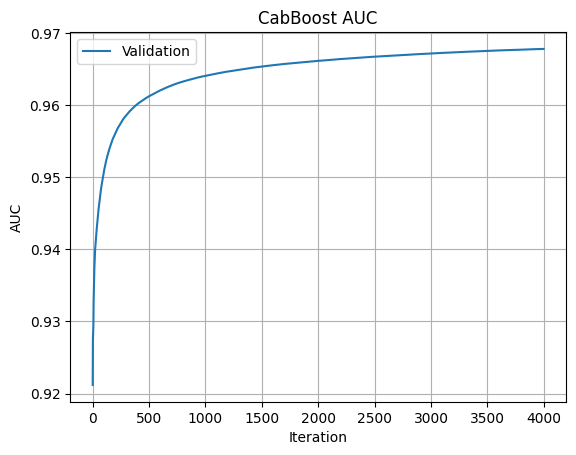

In [31]:
import  matplotlib.pyplot as plt
# 履歴の可視化
plt.plot(cb_auc_score, label='Validation')
plt.xlabel('Iteration')
plt.ylabel('AUC')
plt.grid()
plt.legend()
plt.title("CabBoost AUC")
plt.show()

### Stacking

In [32]:
# from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# from sklearn.metrics import roc_auc_score

# print("# STACKING ENSEMBLE IMPLEMENTATION")
# print("# " + "="*50)
# print("# Combining top 3 models: LightGBM, XGBoost, CatBoost")
# print("# Meta-learner: Logistic Regression")
# print("# " + "="*50)

# stacking_train = pd.DataFrame({
#     'lgb': pred_lgb,
#     'xgb': pred_xgb, 
#     'cat': pred_cb
# })

# stacking_test = pd.DataFrame({
#     'lgb': pred_lgb_test,
#     'xgb': pred_xgb_test,
#     'cat': pred_cb_test
# })

# print(f"# Stacking train shape: {stacking_train.shape}")
# print(f"# Stacking test shape: {stacking_test.shape}")

# print("\n# METHOD 1: WEIGHTED AVERAGE")
# print("# " + "-"*30)

# scores = [AUC_lgb, AUC_xgb, AUC_cb]  
# total_score = sum(scores)
# weights = [score/total_score for score in scores]

# print(f"# Model weights:")
# print(f"# LightGBM: {weights[0]:.4f}")
# print(f"# XGBoost:  {weights[1]:.4f}")
# print(f"# CatBoost: {weights[2]:.4f}")

# weighted_oof = (stacking_train['lgb'] * weights[0] + 
#                 stacking_train['xgb'] * weights[1] + 
#                 stacking_train['cat'] * weights[2])

# weighted_test = (stacking_test['lgb'] * weights[0] + 
#                  stacking_test['xgb'] * weights[1] + 
#                  stacking_test['cat'] * weights[2])

# weighted_score = roc_auc_score(y, weighted_oof)
# print(f"# Weighted Average ROC AUC: {weighted_score:.6f}")

# print("\n# METHOD 2: LOGISTIC REGRESSION META-LEARNER")
# print("# " + "-"*40)

# meta_learner = LogisticRegression(random_state=42, max_iter=1000)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# cv_scores = cross_val_score(meta_learner, stacking_train, y, 
#                            cv=skf, scoring='roc_auc', n_jobs=-1)

# print(f"# Meta-learner CV scores: {[f'{score:.6f}' for score in cv_scores]}")
# print(f"# Meta-learner mean CV: {cv_scores.mean():.6f} ± {cv_scores.std():.6f}")

# meta_learner.fit(stacking_train, y)
# meta_oof = meta_learner.predict_proba(stacking_train)[:, 1]
# meta_test = meta_learner.predict_proba(stacking_test)[:, 1]
# meta_score = roc_auc_score(y, meta_oof)

# print(f"# Meta-learner ROC AUC: {meta_score:.6f}")

# coefficients = meta_learner.coef_[0]
# print(f"# Meta-learner coefficients:")
# print(f"# LightGBM: {coefficients[0]:.4f}")
# print(f"# XGBoost:  {coefficients[1]:.4f}")
# print(f"# CatBoost: {coefficients[2]:.4f}")
# print(f"# Intercept: {meta_learner.intercept_[0]:.4f}")

# print("\n# METHOD 3: SIMPLE AVERAGE (BASELINE)")
# print("# " + "-"*35)

# simple_oof = (stacking_train['lgb'] + stacking_train['xgb'] + stacking_train['cat']) / 3
# simple_test = (stacking_test['lgb'] + stacking_test['xgb'] + stacking_test['cat']) / 3
# simple_score = roc_auc_score(y, simple_oof)

# print(f"# Simple Average ROC AUC: {simple_score:.6f}")

# print("\n# ENSEMBLE METHODS COMPARISON")
# print("# " + "="*40)
# ensemble_results = [
#     ('Individual LightGBM', AUC_lgb),
#     ('Individual XGBoost', AUC_xgb),
#     ('Individual CatBoost', AUC_cb),
#     ('Weighted Average', weighted_score),
#     ('Meta-learner (LogReg)', meta_score),
#     ('Simple Average', simple_score)
# ]

# ensemble_results.sort(key=lambda x: x[1], reverse=True)

# for i, (method, score) in enumerate(ensemble_results, 1):
#     print(f"# {i}. {method:<25}: {score:.6f}")

# best_method, best_score = ensemble_results[0]
# print(f"\n# BEST ENSEMBLE METHOD: {best_method}")
# print(f"# BEST ENSEMBLE SCORE: {best_score:.6f}")

# if 'Meta-learner' in best_method:
#     final_oof = meta_oof
#     final_test = meta_test
#     print("# Using Meta-learner predictions for final submission")
# elif 'Weighted' in best_method:
#     final_oof = weighted_oof
#     final_test = weighted_test
#     print("# Using Weighted Average predictions for final submission")
# else:
#     final_oof = simple_oof
#     final_test = simple_test
#     print("# Using Simple Average predictions for final submission")

# print("\n# STACKING ENSEMBLE COMPLETED!")
# print("# " + "="*50)

In [33]:
# # 提出データ作成
# sample_submission = pd.read_csv("/kaggle/input/playground-series-s5e8/sample_submission.csv")

# sample_submission['y'] = final_test
# sample_submission.to_csv('submission.csv', index=False)
# print('Submission file saved.')

### 【Neural Net】

In [34]:
import random
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# pytorch実装
import torch # Tensorの作成や操作
import torch.nn as nn # ニューラルネットワーク
import torch.nn.functional as F # 関数をメソッドとして提供
import torch.optim as optim # オプティマイザ
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from tqdm.notebook import tqdm
# from tqdm import tqdm
import matplotlib.pyplot as plt
import time

# GPUの使用状況確認
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

all_df = all_df_NN
all_df = all_df.drop(["id","y"],axis=1)
y = train_df["y"]

# 設定
SEED = 42
TARGET = "y"

CATEGORICAL = cat_col
NUMERICAL = num_col
USE = CATEGORICAL + NUMERICAL
# df_train = train_df.drop("id",axis=1)
# df_test = test_df.drop("id",axis=1)

cuda:0


In [35]:
# (1) 住宅ローン + ローン
all_df["housing_loan"] = all_df["housing"].astype(str) + "_" + all_df["loan"].astype(str)

# (2) コンタクト時間 x 年齢
all_df["duration_x_age"] = all_df["duration"] * all_df["age"]

# (3) sin,cos(コンタクト時間)
all_df['duration_sin'] = np.sin(2*np.pi * all_df['duration'] / 400)
all_df['duration_cos'] = np.cos(2*np.pi * all_df['duration'] / 400)

# (4) monthを数値に直し周期的に使う
month_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
all_df['month_num'] = all_df['month'].map(month_map).astype('int')
all_df['month_sin'] = np.sin(2 * np.pi * all_df['month_num'] / 12)
all_df['month_cos'] = np.cos(2 * np.pi * all_df['month_num'] / 12)

# (5) コンタクト時間をカテゴリ化
all_df['duration_bin'] = pd.cut(
    all_df['duration'],
    bins=[0, 60, 300, 600, 900, float('inf')],
    labels=['short', 'medium', 'long', 'very_long', 'extreme'],
    right=False)
all_df['duration_bin'] = all_df['duration_bin'].astype("object")

# (6) 連絡手段 + 年齢
all_df['age_group'] = pd.cut(
    all_df['age'],
    bins=[0, 30, 45, 60, 100],
    labels=['young', 'mid', 'senior', 'elder'])
all_df["contact_age"] = all_df["contact"].astype(str) + "_" + all_df["age_group"].astype(str)
all_df = all_df.drop("age_group",axis=1)

# (7) sin,cos(pdays)
all_df['pdays_sin'] = np.sin(2*np.pi * all_df['pdays'] / 90)
all_df['pdays_cos'] = np.cos(2*np.pi * all_df['pdays'] / 90)

In [36]:
# 標準化 + ラベルエンコード
def preprocessing(all_df, cat_cols=CATEGORICAL, num_cols=NUMERICAL, target=TARGET):

    # 訓練データとテストデータに分離
    train = all_df[:len(train_df)]
    test = all_df[len(train_df):]

    # y = train[target]
    # train = train.drop("y",axis=1)
    train_len = len(train)

    # 訓練データ + テストデータ
    # df = pd.concat([train.drop(columns=target), test])
    # y = train[target]
    # train_len = len(train)
    
    # 欠損埋め
    # df[cat_cols] = df[cat_cols].fillna('None')
    # df[num_cols] = df[num_cols].fillna(0)

    # train = df[:train_len]
    # test = df[train_len:]

    # 標準化
    scaler = StandardScaler()

    # フィッティング
    # scaler.fit(df[num_cols])
    scaler.fit(train[num_cols])

    # 適用
    train[num_cols] = scaler.transform(train[num_cols])
    test[num_cols] = scaler.transform(test[num_cols])
    df = pd.concat([train, test])
    
    # ラベルエンコーダ
    for col in df.columns:
        if col in cat_cols:
            df[col] = LabelEncoder().fit_transform(df[col])
            df[col]= df[col].astype('category')
            
    return pd.concat([df.iloc[:train_len], y], axis=1), df.iloc[train_len:]

In [37]:
# 前処理の実施
df_train, df_test = preprocessing(all_df)

In [38]:
# データセット関数
class CustomDataset(Dataset):

    # オブジェクト定義
    def __init__(self, df, target, cat_cols=CATEGORICAL):
        self.df_cat = df[cat_cols]
        self.df_num = df.drop(cat_cols, axis=1)
        self.X_cats = self.df_cat.values.astype(np.int64)
        self.X_nums = self.df_num.values.astype(np.float32)
        self.target = target.values.astype(np.int64)

    # データセットのサイズを返す
    def __len__(self):
        return len(self.target)

    # 指定したインデックスのデータとラベルを返す
    def __getitem__(self, idx):
        return [self.X_cats[idx], self.X_nums[idx], self.target[idx]]

In [39]:
# NNモデル作成
class NN_Model(nn.Module):

    # ネットワーク構造の定義
    def __init__(self, embedding_sizes, n_num):
        super().__init__()
        self.embeddings = nn.ModuleList([nn.Embedding(categories, size) for categories, size in embedding_sizes])
        n_emb = sum(e.embedding_dim for e in self.embeddings)
        self.n_emb, self.n_num = n_emb, n_num
        self.lin1 = nn.Linear(self.n_emb + self.n_num, 100)
        self.lin2 = nn.Linear(100, 70)
        self.lin3 = nn.Linear(70, 2)
        self.bn1 = nn.BatchNorm1d(self.n_num)
        self.bn2 = nn.BatchNorm1d(100)
        self.bn3 = nn.BatchNorm1d(70)
        self.emb_drop = nn.Dropout(0.6)
        self.drops = nn.Dropout(0.3)
 
    # 順伝播
    def forward(self,x_cat,x_num):
        x = [e(x_cat[:, i]) for i, e in enumerate(self.embeddings)]
        x = torch.cat(x, dim=1)
        x = self.emb_drop(x)
        x2 = self.bn1(x_num)
        x = torch.cat([x, x2], dim=1)
        x = F.relu(self.lin1(x))
        x = self.drops(x)
        x = self.bn2(x)
        x = F.relu(self.lin2(x))
        x = self.drops(x)
        x = self.bn3(x)
        x = self.lin3(x)
        return x

In [40]:
# ラベルエンコード済みカテゴリ変数の埋め込み
# 各カテゴリ列の変数の種類
cat_sizes = [len(df_train[col].cat.categories) for col in CATEGORICAL]

# (入力サイズ, 50と割る2の小さい方)でエンコード
emb_sizes = [(size, min(50, (size+1)//2)) for size in cat_sizes]

In [41]:
# 記録用
hist = {
    'train_loss': [], 'train_auc': [],
    'val_loss': [], 'val_auc': []
}

# パラメータ
bs = 64 # バッチサイズ
EPOCHS = 5 # エポック
save_every = 1
FOLDS = 5 # FOLD数
LR=1e-3 # 学習率

patience = 3

# stratified KFoldの宣言
skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=42)

fold_results = []

val_results = []
test_results = []

# SKFによるデータ分割
for fold, (train_idx, val_idx) in enumerate(skf.split(df_train.drop(columns=TARGET), df_train[TARGET])):
    
    print(f"\n========== Fold {fold+1} ==========")

    # 学習データ
    X_train = df_train.drop(columns=TARGET).iloc[train_idx] 
    y_train = df_train[TARGET].iloc[train_idx]

    # バリデーションデータ
    X_val = df_train.drop(columns=TARGET).iloc[val_idx]
    y_val = df_train[TARGET].iloc[val_idx]

    # Datasetの作成
    train_dataset = CustomDataset(X_train, y_train)
    val_dataset = CustomDataset(X_val, y_val)
    
    # DataLoaderの作成
    train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True, num_workers=0)
    val_loader = DataLoader(val_dataset, batch_size=bs, shuffle=False, num_workers=0)

    # モデル構築
    model = NN_Model(emb_sizes, len(NUMERICAL)).to(device)

    # 最適化設定
    optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-5)
    # optimizer = torch.optim.Adam(model.parameters(), lr=LR)

    # 損失関数
    criterion = nn.CrossEntropyLoss()

    hist = {"train_auc": [], "val_auc": []}
    best_val_auc = 0
    counter = 0

    # 学習・予測エポックのループ
    for epoch in range(EPOCHS):

        # 開始時間
        start_time = time.time()

        # 学習モード
        model.train()

        # ラベル、予測値の保存場所
        y_true_train, y_pred_train = [], []

        # プログレスバー
        train_iter = tqdm(train_loader, desc=f"<Train> Epoch {epoch+1}", leave=False)
        
        for i, (cat_data, num_data, target) in enumerate(train_iter):

            # DataLoaderから取り出した、カテゴリ、数値、ターゲット
            cat_data, num_data, target = cat_data.to(device), num_data.to(device), target.to(device)

            # パラメータの勾配を初期化
            optimizer.zero_grad()

            # 予測値の算出
            output = model(cat_data, num_data)

            # ラベルと予測値とのロス計算
            loss = criterion(output, target)

            # 各パラメータの勾配を算出
            loss.backward()

            # パラメータ更新
            optimizer.step()

            # ソフトマックスの分類結果を格納
            probs = torch.softmax(output, dim=1)[:, 1].detach().cpu().numpy()
            y_pred_train.extend(probs)

            # ラベルの格納
            y_true_train.extend(target.cpu().numpy())

            # プログレスバーの後ろにロス値を表示
            if i % 10 == 0:
                train_iter.set_postfix(loss=loss.item())

        # チェックポイント保存
        if (epoch + 1) % save_every == 0:
            torch.save(model.state_dict(), f"model_epoch{epoch+1}.pt")        
    
        # histに残すAUCスコア
        train_auc = roc_auc_score(y_true_train, y_pred_train)

        # 評価モード
        model.eval()

        # ラベル、予測値の保存場所        
        y_true_val, y_pred_val = [], []

        # プログレスバー
        val_iter = tqdm(val_loader, desc=f"<Val> Epoch {epoch+1}", leave=False)

        # 勾配を更新しない
        with torch.no_grad():
            
            for cat_data, num_data, target in val_iter:
    
                # DataLoaderから取り出した、カテゴリ、数値、ターゲット
                cat_data, num_data, target = cat_data.to(device), num_data.to(device), target.to(device)

                # 予測値の算出
                output = model(cat_data, num_data)

                # ソフトマックスの分類結果を格納
                probs = torch.softmax(output, dim=1)[:, 1].cpu().numpy()
                y_pred_val.extend(probs)

                # ラベルの格納
                y_true_val.extend(target.cpu().numpy())

                # プログレスバーの後ろにロス値を表示
                val_iter.set_postfix(loss=criterion(output, target).item())

        # histに残すAUCスコア        
        val_auc = roc_auc_score(y_true_val, y_pred_val)

        # 差分時刻
        elapsed = time.time() - start_time

        # 履歴追加
        hist["train_auc"].append(train_auc)
        hist["val_auc"].append(val_auc)

        # 進捗
        print(f"Epoch {epoch+1}/{EPOCHS} - TrainAUC: {train_auc:.4f} | ValAUC: {val_auc:.4f} | Time: {elapsed:.1f}s")

        # チェックポイント
        if (epoch + 1) % save_every == 0:
            torch.save(model.state_dict(), f"model_fold{fold+1}_epoch{epoch+1}.pth")

        # EarlyStopping判定
        if val_auc > best_val_auc:
            best_val_auc = val_auc
            counter = 0
            torch.save(model.state_dict(), f"best_model_fold{fold+1}.pth")
        else:
            counter += 1
            if counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

    
    # foldごとに保存
    torch.save(model.state_dict(), f"model_fold{fold+1}.pth")
    
    # ヒストグラムの更新
    fold_results.append(hist)

    # foldごとにテストデータ計算
    model.eval()
    with torch.no_grad():
        X_val_cat = torch.from_numpy(df_train[CATEGORICAL].values.astype(np.int64)).to(device)
        X_val_num = torch.from_numpy(df_train[NUMERICAL].values.astype(np.float32)).to(device)

        # 予測
        preds = torch.softmax(model(X_val_cat, X_val_num),dim=1)[:,1].cpu().numpy()
        val_results.append(preds)
        
        X_test_cat = torch.from_numpy(df_test[CATEGORICAL].values.astype(np.int64)).to(device)
        X_test_num = torch.from_numpy(df_test[NUMERICAL].values.astype(np.float32)).to(device)

        # 予測
        preds = torch.softmax(model(X_test_cat, X_test_num),dim=1)[:,1].cpu().numpy()
        # preds = torch.softmax(model(X_test_cat, X_test_num).squeeze()).cpu().numpy()
        test_results.append(preds)
    
# shape = (n_folds, n_test_samples) → 平均化
val_results = np.mean(val_results, axis=0)        
test_results = np.mean(test_results, axis=0)        


========== Fold 1 ==========


<Train> Epoch 1:   0%|          | 0/9375 [00:00<?, ?it/s]

<Val> Epoch 1:   0%|          | 0/2344 [00:00<?, ?it/s]

Epoch 1/5 - TrainAUC: 0.9295 | ValAUC: 0.9564 | Time: 45.6s


<Train> Epoch 2:   0%|          | 0/9375 [00:00<?, ?it/s]

<Val> Epoch 2:   0%|          | 0/2344 [00:00<?, ?it/s]

Epoch 2/5 - TrainAUC: 0.9445 | ValAUC: 0.9591 | Time: 45.1s


<Train> Epoch 3:   0%|          | 0/9375 [00:00<?, ?it/s]

<Val> Epoch 3:   0%|          | 0/2344 [00:00<?, ?it/s]

Epoch 3/5 - TrainAUC: 0.9474 | ValAUC: 0.9595 | Time: 45.1s


<Train> Epoch 4:   0%|          | 0/9375 [00:00<?, ?it/s]

<Val> Epoch 4:   0%|          | 0/2344 [00:00<?, ?it/s]

Epoch 4/5 - TrainAUC: 0.9487 | ValAUC: 0.9599 | Time: 45.1s


<Train> Epoch 5:   0%|          | 0/9375 [00:00<?, ?it/s]

<Val> Epoch 5:   0%|          | 0/2344 [00:00<?, ?it/s]

Epoch 5/5 - TrainAUC: 0.9494 | ValAUC: 0.9601 | Time: 45.0s

========== Fold 2 ==========


<Train> Epoch 1:   0%|          | 0/9375 [00:00<?, ?it/s]

<Val> Epoch 1:   0%|          | 0/2344 [00:00<?, ?it/s]

Epoch 1/5 - TrainAUC: 0.9290 | ValAUC: 0.9547 | Time: 45.3s


<Train> Epoch 2:   0%|          | 0/9375 [00:00<?, ?it/s]

<Val> Epoch 2:   0%|          | 0/2344 [00:00<?, ?it/s]

Epoch 2/5 - TrainAUC: 0.9442 | ValAUC: 0.9568 | Time: 45.5s


<Train> Epoch 3:   0%|          | 0/9375 [00:00<?, ?it/s]

<Val> Epoch 3:   0%|          | 0/2344 [00:00<?, ?it/s]

Epoch 3/5 - TrainAUC: 0.9470 | ValAUC: 0.9572 | Time: 45.4s


<Train> Epoch 4:   0%|          | 0/9375 [00:00<?, ?it/s]

<Val> Epoch 4:   0%|          | 0/2344 [00:00<?, ?it/s]

Epoch 4/5 - TrainAUC: 0.9482 | ValAUC: 0.9580 | Time: 45.3s


<Train> Epoch 5:   0%|          | 0/9375 [00:00<?, ?it/s]

<Val> Epoch 5:   0%|          | 0/2344 [00:00<?, ?it/s]

Epoch 5/5 - TrainAUC: 0.9495 | ValAUC: 0.9589 | Time: 45.4s

========== Fold 3 ==========


<Train> Epoch 1:   0%|          | 0/9375 [00:00<?, ?it/s]

<Val> Epoch 1:   0%|          | 0/2344 [00:00<?, ?it/s]

Epoch 1/5 - TrainAUC: 0.9300 | ValAUC: 0.9553 | Time: 45.4s


<Train> Epoch 2:   0%|          | 0/9375 [00:00<?, ?it/s]

<Val> Epoch 2:   0%|          | 0/2344 [00:00<?, ?it/s]

Epoch 2/5 - TrainAUC: 0.9453 | ValAUC: 0.9574 | Time: 45.5s


<Train> Epoch 3:   0%|          | 0/9375 [00:00<?, ?it/s]

<Val> Epoch 3:   0%|          | 0/2344 [00:00<?, ?it/s]

Epoch 3/5 - TrainAUC: 0.9476 | ValAUC: 0.9582 | Time: 45.8s


<Train> Epoch 4:   0%|          | 0/9375 [00:00<?, ?it/s]

<Val> Epoch 4:   0%|          | 0/2344 [00:00<?, ?it/s]

Epoch 4/5 - TrainAUC: 0.9488 | ValAUC: 0.9586 | Time: 45.5s


<Train> Epoch 5:   0%|          | 0/9375 [00:00<?, ?it/s]

<Val> Epoch 5:   0%|          | 0/2344 [00:00<?, ?it/s]

Epoch 5/5 - TrainAUC: 0.9497 | ValAUC: 0.9588 | Time: 45.5s

========== Fold 4 ==========


<Train> Epoch 1:   0%|          | 0/9375 [00:00<?, ?it/s]

<Val> Epoch 1:   0%|          | 0/2344 [00:00<?, ?it/s]

Epoch 1/5 - TrainAUC: 0.9289 | ValAUC: 0.9564 | Time: 45.2s


<Train> Epoch 2:   0%|          | 0/9375 [00:00<?, ?it/s]

<Val> Epoch 2:   0%|          | 0/2344 [00:00<?, ?it/s]

Epoch 2/5 - TrainAUC: 0.9447 | ValAUC: 0.9586 | Time: 45.3s


<Train> Epoch 3:   0%|          | 0/9375 [00:00<?, ?it/s]

<Val> Epoch 3:   0%|          | 0/2344 [00:00<?, ?it/s]

Epoch 3/5 - TrainAUC: 0.9471 | ValAUC: 0.9591 | Time: 45.1s


<Train> Epoch 4:   0%|          | 0/9375 [00:00<?, ?it/s]

<Val> Epoch 4:   0%|          | 0/2344 [00:00<?, ?it/s]

Epoch 4/5 - TrainAUC: 0.9486 | ValAUC: 0.9594 | Time: 45.4s


<Train> Epoch 5:   0%|          | 0/9375 [00:00<?, ?it/s]

<Val> Epoch 5:   0%|          | 0/2344 [00:00<?, ?it/s]

Epoch 5/5 - TrainAUC: 0.9494 | ValAUC: 0.9596 | Time: 45.1s

========== Fold 5 ==========


<Train> Epoch 1:   0%|          | 0/9375 [00:00<?, ?it/s]

<Val> Epoch 1:   0%|          | 0/2344 [00:00<?, ?it/s]

Epoch 1/5 - TrainAUC: 0.9297 | ValAUC: 0.9562 | Time: 45.5s


<Train> Epoch 2:   0%|          | 0/9375 [00:00<?, ?it/s]

<Val> Epoch 2:   0%|          | 0/2344 [00:00<?, ?it/s]

Epoch 2/5 - TrainAUC: 0.9451 | ValAUC: 0.9575 | Time: 45.9s


<Train> Epoch 3:   0%|          | 0/9375 [00:00<?, ?it/s]

<Val> Epoch 3:   0%|          | 0/2344 [00:00<?, ?it/s]

Epoch 3/5 - TrainAUC: 0.9477 | ValAUC: 0.9586 | Time: 45.5s


<Train> Epoch 4:   0%|          | 0/9375 [00:00<?, ?it/s]

<Val> Epoch 4:   0%|          | 0/2344 [00:00<?, ?it/s]

Epoch 4/5 - TrainAUC: 0.9490 | ValAUC: 0.9587 | Time: 45.5s


<Train> Epoch 5:   0%|          | 0/9375 [00:00<?, ?it/s]

<Val> Epoch 5:   0%|          | 0/2344 [00:00<?, ?it/s]

Epoch 5/5 - TrainAUC: 0.9497 | ValAUC: 0.9592 | Time: 45.1s


In [42]:
pred_NN = val_results
pred_NN_test = test_results
AUC_NN = np.average(hist["val_auc"])

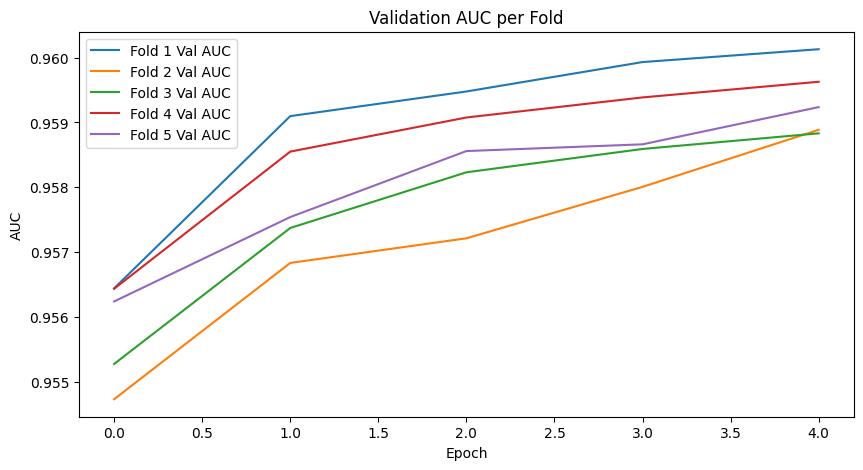

In [43]:
# ======================
# FoldごとのAUCをプロット
# ======================
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i, hist in enumerate(fold_results):
    plt.plot(hist["val_auc"], label=f"Fold {i+1} Val AUC")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()
plt.title("Validation AUC per Fold")
plt.show() 

In [44]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score

print("# STACKING ENSEMBLE IMPLEMENTATION")
print("# " + "="*50)
print("# Combining top 4 models: LightGBM, XGBoost, CatBoost, NN")
print("# Meta-learner: Logistic Regression")
print("# " + "="*50)

stacking_train = pd.DataFrame({
    'lgb': pred_lgb,
    'xgb': pred_xgb, 
    'cat': pred_cb,
    'NN': pred_NN,
})

stacking_test = pd.DataFrame({
    'lgb': pred_lgb_test,
    'xgb': pred_xgb_test,
    'cat': pred_cb_test,
    'NN': pred_NN_test,
})

print(f"# Stacking train shape: {stacking_train.shape}")
print(f"# Stacking test shape: {stacking_test.shape}")

print("\n# METHOD 1: WEIGHTED AVERAGE")
print("# " + "-"*30)

scores = [AUC_lgb, AUC_xgb, AUC_cb, AUC_NN]  
total_score = sum(scores)
weights = [score/total_score for score in scores]

print(f"# Model weights:")
print(f"# LightGBM: {weights[0]:.4f}")
print(f"# XGBoost:  {weights[1]:.4f}")
print(f"# CatBoost: {weights[2]:.4f}")
print(f"# NN: {weights[3]:.4f}")

weighted_oof = (stacking_train['lgb'] * weights[0] + 
                stacking_train['xgb'] * weights[1] + 
                stacking_train['cat'] * weights[2] +
                stacking_train['NN'] * weights[3])

weighted_test = (stacking_test['lgb'] * weights[0] + 
                 stacking_test['xgb'] * weights[1] + 
                 stacking_test['cat'] * weights[2] +
                 stacking_test['NN'] * weights[3])

weighted_score = roc_auc_score(y, weighted_oof)
print(f"# Weighted Average ROC AUC: {weighted_score:.6f}")

print("\n# METHOD 2: LOGISTIC REGRESSION META-LEARNER")
print("# " + "-"*40)

meta_learner = LogisticRegression(penalty="l2",random_state=42, max_iter=1000)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(meta_learner, stacking_train, y, 
                           cv=skf, scoring='roc_auc', n_jobs=-1)

print(f"# Meta-learner CV scores: {[f'{score:.6f}' for score in cv_scores]}")
print(f"# Meta-learner mean CV: {cv_scores.mean():.6f} ± {cv_scores.std():.6f}")

meta_learner.fit(stacking_train, y)
meta_oof = meta_learner.predict_proba(stacking_train)[:, 1]
meta_test = meta_learner.predict_proba(stacking_test)[:, 1]
meta_score = roc_auc_score(y, meta_oof)

print(f"# Meta-learner ROC AUC: {meta_score:.6f}")

coefficients = meta_learner.coef_[0]
print(f"# Meta-learner coefficients:")
print(f"# LightGBM: {coefficients[0]:.4f}")
print(f"# XGBoost:  {coefficients[1]:.4f}")
print(f"# CatBoost: {coefficients[2]:.4f}")
print(f"# NN: {coefficients[3]:.4f}")
print(f"# Intercept: {meta_learner.intercept_[0]:.4f}")

print("\n# METHOD 3: SIMPLE AVERAGE (BASELINE)")
print("# " + "-"*35)

simple_oof = (stacking_train['lgb'] + stacking_train['xgb'] + stacking_train['cat'] + stacking_train['NN']) / 4
simple_test = (stacking_test['lgb'] + stacking_test['xgb'] + stacking_test['cat'] + stacking_test['NN']) / 4
simple_score = roc_auc_score(y, simple_oof)

print(f"# Simple Average ROC AUC: {simple_score:.6f}")

print("\n# ENSEMBLE METHODS COMPARISON")
print("# " + "="*40)
ensemble_results = [
    ('Individual LightGBM', AUC_lgb),
    ('Individual XGBoost', AUC_xgb),
    ('Individual CatBoost', AUC_cb),
    ('Individual NN', AUC_NN),
    ('Weighted Average', weighted_score),
    ('Meta-learner (LogReg)', meta_score),
    ('Simple Average', simple_score)
]

ensemble_results.sort(key=lambda x: x[1], reverse=True)

for i, (method, score) in enumerate(ensemble_results, 1):
    print(f"# {i}. {method:<25}: {score:.6f}")

best_method, best_score = ensemble_results[0]
print(f"\n# BEST ENSEMBLE METHOD: {best_method}")
print(f"# BEST ENSEMBLE SCORE: {best_score:.6f}")

if 'Meta-learner' in best_method:
    final_oof = meta_oof
    final_test = meta_test
    print("# Using Meta-learner predictions for final submission")
elif 'Weighted' in best_method:
    final_oof = weighted_oof
    final_test = weighted_test
    print("# Using Weighted Average predictions for final submission")
else:
    final_oof = simple_oof
    final_test = simple_test
    print("# Using Simple Average predictions for final submission")

print("\n# STACKING ENSEMBLE COMPLETED!")
print("# " + "="*50)

# STACKING ENSEMBLE IMPLEMENTATION
# ==================================================
# Combining top 4 models: LightGBM, XGBoost, CatBoost, NN
# Meta-learner: Logistic Regression
# ==================================================
# Stacking train shape: (750000, 4)
# Stacking test shape: (250000, 4)

# METHOD 1: WEIGHTED AVERAGE
# ------------------------------
# Model weights:
# LightGBM: 0.2510
# XGBoost:  0.2509
# CatBoost: 0.2503
# NN: 0.2478
# Weighted Average ROC AUC: 0.970016

# METHOD 2: LOGISTIC REGRESSION META-LEARNER
# ----------------------------------------
# Meta-learner CV scores: ['0.971372', '0.970906', '0.970596', '0.971788', '0.970961']
# Meta-learner mean CV: 0.971124 ± 0.000414
# Meta-learner ROC AUC: 0.971126
# Meta-learner coefficients:
# LightGBM: 4.0264
# XGBoost:  3.0855
# CatBoost: 0.0706
# NN: 0.7253
# Intercept: -4.0732

# METHOD 3: SIMPLE AVERAGE (BASELINE)
# -----------------------------------
# Simple Average ROC AUC: 0.970003

# ENSEMBLE METHODS CO

In [45]:
# 提出データ作成
sample_submission = pd.read_csv("/kaggle/input/playground-series-s5e8/sample_submission.csv")

sample_submission['y'] = test_results
sample_submission.to_csv('submission.csv', index=False)
print('Submission file saved.')

Submission file saved.
